In [1]:
!apt-get -qq install -y
!pip uninstall scikit-learn -y
!pip install scikit-learn


Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)


In [2]:


%tensorflow_version 2.X

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.svm import SVR

uploaded = files.upload()


df = pd.read_excel('pptplusterm.xlsx')
df.to_csv('pptplusterm.csv', index=False)
total = pd.read_csv('pptplusterm.csv')


data_train, data_temp = train_test_split(total,test_size=0.4 , random_state = 42)
data_val, data_test = train_test_split(data_temp ,test_size = 0.5, random_state = 42)

dftrain = data_train['PPT'] + data_train['TM']
y_train = data_train['SA']

df_val = data_val['PPT'] + data_val['TM']
y_val = data_val['SA']

df_test = data_test['PPT'] + data_test['TM']
y_test = data_test['SA']




Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Saving pptplusterm.xlsx to pptplusterm (1).xlsx


<Axes: >

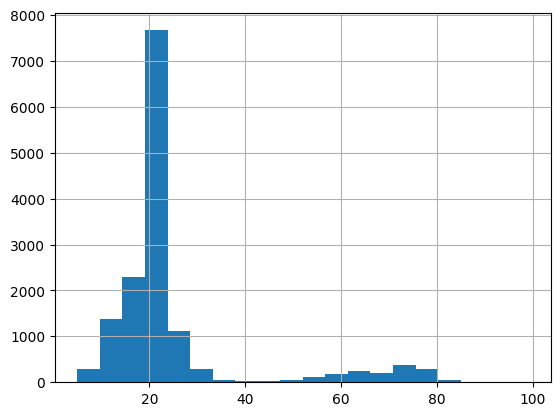

In [ ]:
dftrain.TM.hist(bins=20)


In [ ]:
dftrain.head()

,TM,PPT
17349,20,1
17924,20,20
5504,81,25
16346,10,1
13052,12,9


now we will do normalization with z_score technique

we will now define the normalization layer

then we will adapt the normalization layer to our dataset

In [3]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
normalization_layerdf = tf.keras.layers.experimental.preprocessing.Normalization()
normalization_layery_train = tf.keras.layers.experimental.preprocessing.Normalization()
normalization_layerdf.adapt(dftrain)

normalization_layery_train.adapt(y_train)


normalized_y_traindata_zscore = normalization_layery_train(y_train)
normalized_dfdata_zscore = normalization_layerdf(dftrain)


print("original x data:")
print(dftrain[:5])
print("normalized data:")
print(normalized_dfdata_zscore[:5])

print("original y data")
print(y_train[:5])
print("normalized data:")
print(normalized_y_traindata_zscore[:5])

original x data:
17028    25
1287     40
5557     89
13632    34
7716     70
dtype: int64
normalized data:
tf.Tensor(
[[-0.8307638  -0.09096703  2.3257024  ... -0.09096703 -0.28824615
  -0.09096703]], shape=(1, 10985), dtype=float32)
original y data
17028    100000
1287      50000
5557     100000
13632     55000
7716     200000
Name: SA, dtype: int64
normalized data:
tf.Tensor(
[[ 0.04357034 -0.42107156  0.04357034 ... -0.41177872 -0.65339255
   0.04357034]], shape=(1, 10985), dtype=float32)


now we will do normalization with min_max technique

In [4]:
dftrain = np.array(dftrain).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
df_val = np.array(df_val).reshape(-1,1)
y_val = np.array(y_val).reshape(-1,1)
df_test = np.array(df_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)



Scaler_dftrain = MinMaxScaler()
Scaler_y_train = MinMaxScaler()
Scaler_y_val = MinMaxScaler()
Scaler_df_val = MinMaxScaler()
Scaler_df_test = MinMaxScaler()
Scaler_y_test = MinMaxScaler()

normalized_dftrain = Scaler_dftrain.fit_transform(dftrain)
normalized_y_train = Scaler_y_train.fit_transform(y_train)
normalized_y_val = Scaler_y_val.fit_transform(y_val)
normalized_df_val = Scaler_df_val.fit_transform(df_val)
normalized_df_test = Scaler_df_test.fit_transform(df_test)
normalized_y_test = Scaler_y_test.fit_transform(y_test)


print("original x data:")
print(dftrain[:5])
print("normalized data :")
print(normalized_dftrain [:5])


print("original y data:")
print(y_train[:5])
print("normalized data :")
print(normalized_y_train[:5])

print("original y_val data:")
print(y_val[:5])
print("normalizd data of y_val:")
print(normalized_y_val [:5])

print("original df_val data:")
print(df_val[:5])
print("normalized data of dfval")
print(normalized_df_val[:5])



print("original dftest data:")
print(df_test[:5])
print("normalized data of df_test")
print(normalized_df_test[:5])

print("original ytest data ")
print(y_test[:5])
print("normalized data")
print(normalized_y_test[:5])







original x data:
[[25]
 [40]
 [89]
 [34]
 [70]]
normalized data :
[[0.11445783]
 [0.20481928]
 [0.5       ]
 [0.1686747 ]
 [0.38554217]]
original y data:
[[100000]
 [ 50000]
 [100000]
 [ 55000]
 [200000]]
normalized data :
[[0.04 ]
 [0.02 ]
 [0.04 ]
 [0.022]
 [0.08 ]]
original y_val data:
[[ 25000]
 [120000]
 [ 25000]
 [ 25000]
 [ 50000]]
normalizd data of y_val:
[[0.01666667]
 [0.08      ]
 [0.01666667]
 [0.01666667]
 [0.03333333]]
original df_val data:
[[40]
 [99]
 [40]
 [40]
 [40]]
normalized data of dfval
[[0.22077922]
 [0.6038961 ]
 [0.22077922]
 [0.22077922]
 [0.22077922]]
original dftest data:
[[12]
 [40]
 [18]
 [11]
 [36]]
normalized data of df_test
[[0.04761905]
 [0.26984127]
 [0.0952381 ]
 [0.03968254]
 [0.23809524]]
original ytest data 
[[ 25000]
 [ 50000]
 [     0]
 [150000]
 [ 50000]]
normalized data
[[0.02272727]
 [0.04545455]
 [0.        ]
 [0.13636364]
 [0.04545455]]


In [5]:
print("training set shape:" , normalized_dftrain.shape,y_train.shape)
print("validation set shape" , normalized_df_val.shape ,y_val.shape)

training set shape: (10985, 1) (10985, 1)
validation set shape (3662, 1) (3662, 1)


Epoch 1/10
344/344 [==============================] - 1s 2ms/step - loss: 0.0141 - accuracy: 0.0822 - val_loss: 0.0165 - val_accuracy: 0.0803
Epoch 2/10
344/344 [==============================] - 1s 2ms/step - loss: 0.0093 - accuracy: 0.0822 - val_loss: 0.0148 - val_accuracy: 0.0803
Epoch 3/10
344/344 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.0822 - val_loss: 0.0132 - val_accuracy: 0.0803
Epoch 4/10
344/344 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 0.0822 - val_loss: 0.0118 - val_accuracy: 0.0803
Epoch 5/10
344/344 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.0822 - val_loss: 0.0109 - val_accuracy: 0.0803
Epoch 6/10
344/344 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.0822 - val_loss: 0.0099 - val_accuracy: 0.0803
Epoch 7/10
344/344 [==============================] - 1s 2ms/step - loss: 0.0046 - accuracy: 0.0822 - val_loss: 0.0092 - val_accuracy: 0.0803
Epoch 

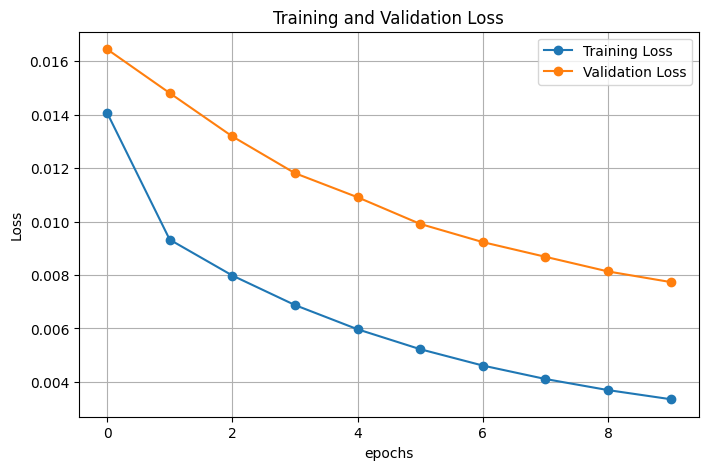

In [28]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape = (dftrain.shape[1],))])

learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(normalized_dftrain, normalized_y_train, epochs= 10 , batch_size=32, validation_data=(normalized_df_val, normalized_y_val), shuffle=True)


normalized_dftrain_loss = history.history['loss']
normalized_df_val_loss = history.history['val_loss']



plt.figure(figsize = (8,5))
plt.plot(normalized_dftrain_loss, label = 'Training Loss', marker = 'o')
plt.plot(normalized_df_val_loss, label = 'Validation Loss', marker ='o')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

now we will generate the graph of predictions with sgd technique

344/344 [==============================] - 0s 1ms/step


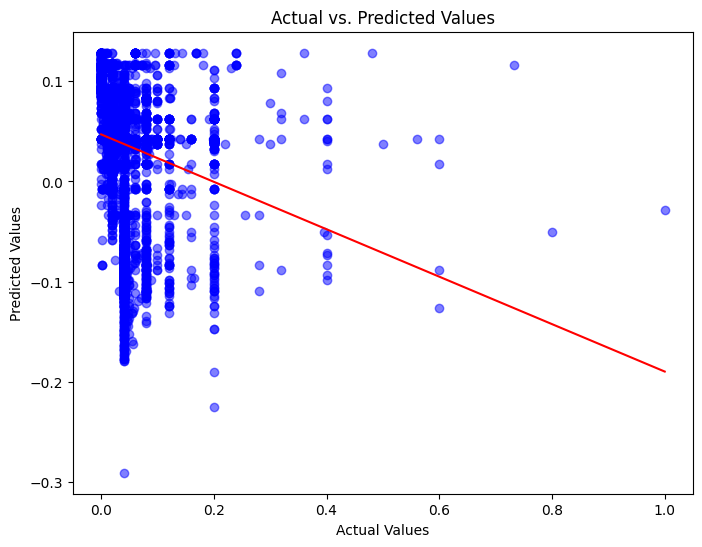

In [22]:

predictions = model.predict(normalized_dftrain).flatten()  # Flatten predictions to make it 1D
normalized_y_test = normalized_y_train.flatten()  # Flatten y_test if it's not 1D

# Plotting the predictions against actual values
plt.figure(figsize=(8, 6))
plt.scatter(normalized_y_test, predictions, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot(np.unique(normalized_y_test.reshape(-1)), np.poly1d(np.polyfit(normalized_y_test, predictions, 1))(np.unique(normalized_y_test)), color='red')  # Adding a trendline
plt.show()

In [23]:
svm = SVR(kernel='rbf' , C = 0.9 , gamma = 'scale')
svm.fit(normalized_dftrain , normalized_y_train)



predictions_svm = svm.predict(normalized_df_test)
def mean_squared_error(true_labels, predicted_values):
    return np.mean((true_labels - predicted_values) ** 2)



mse = mean_squared_error(normalized_y_train, predictions_svm)
print(f"Mean Squarred Error: {mse}")




# Assuming y_test contains the true labels and predictions contains the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(normalized_y_test, predictions_svm, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: operands could not be broadcast together with shapes (10985,) (3662,) 

now we will try support vector machine (svm) technique to train our model and will compare it with stochastic gradient descent technique

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squarred Error: 9463287842.930262


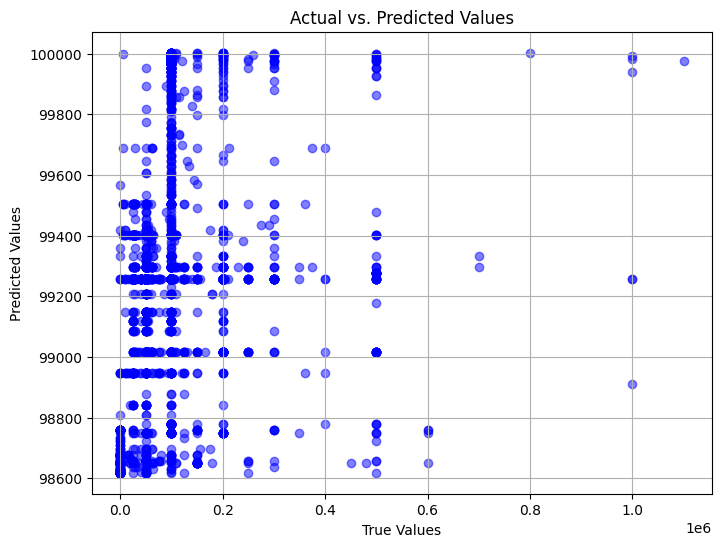

In [18]:
svm = SVR(kernel='rbf' , C = 0.9 , gamma = 'scale')
svm.fit(dftrain , y_train)



predictions_svm = svm.predict(normalized_df_test)
def mean_squared_error(true_labels, predicted_values):
    return np.mean((true_labels - predicted_values) ** 2)



mse = mean_squared_error(y_test, predictions_svm)

print(f"Mean Squarred Error: {mse}")




# Assuming y_test contains the true labels and predictions contains the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_svm, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

normalized_dftrain_loss = history.history['loss']
normalized_df_val_loss = history.history['val_loss']


plt.figure(figsize = (8,5))
plt.plot(normalized_dftrain_loss, label = 'Training Loss', marker = 'o')
plt.plot(normalized_df_val_loss, label = 'Validation Loss', marker ='o')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


now we will do grid analysis for determination of best 'C' value according to our training model


In [17]:
best_mse = float('inf')
best_C = None

for C_value in [i * 0.1 for i in range(1, 21)]:  # C values from 0.1 to 2.0 in steps of 0.1
    # Create and train the SVR model for each C value
    svm = SVR(kernel='rbf', C=C_value)
    svm.fit(normalized_dftrain, normalized_y_train)

    # Calculate MSE on the validation set
    predictions_svm = svm.predict(normalized_df_val)
    mse = mean_squared_error(normalized_y_val, predictions)

    # Check if this C value gives the lowest MSE
    if mse < best_mse:
        best_mse = mse
        best_C = C_value

print(f"Best C value: {best_C} with MSE: {best_mse}")

# Train the final SVM model using the best C value
final_svm = SVR(kernel='rbf', C=best_C , gamma = scale)
final_svm.fit(normalized_dftrain, normalized_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best C value: 0.9 with MSE: 0.006847232290978089


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.9)